In [58]:
import glob
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime, timezone
from vnstock3 import Vnstock
import requests

In [59]:
stock_list = []
volume_list = []

for i in glob.glob(r'D:\Quantitative_Research\H-Tech\vnstock_data\*.csv'):
    stocks = pd.read_csv(i).set_index('time')['close'].reset_index()
    volume = pd.read_csv(i).set_index('time')['volume'].reset_index()
    stocks.columns = ['time', i[-7:-3]]
    volume.columns = ['time', i[-7:-3]]
    stock_list.append(stocks.set_index('time'))
    volume_list.append(volume.set_index('time'))

stock_universe_price = pd.concat(stock_list, axis = 1).sort_index()
stock_universe_vol = pd.concat(volume_list, axis = 1).sort_index()

In [60]:
stock_universe_price.rename(columns=lambda x: x[:-1] if x != 'time' else x, inplace=True)
stock_universe_price.index = pd.to_datetime(stock_universe_price.index)
stock_universe_price

,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,ABR,...,XHC,XLV,XMC,XMD,XMP,XPH,YBC,YBM,YEG,YTC
time,,,,,,,,,,,,,,,,,,,,,
2013-01-02 07:00:00,NaN,4.00,9.69,NaN,NaN,NaN,NaN,NaN,1.77,NaN,...,NaN,NaN,5.09,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-03 07:00:00,NaN,3.89,9.46,NaN,NaN,NaN,NaN,NaN,1.77,NaN,...,NaN,NaN,4.80,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-04 07:00:00,NaN,3.95,9.46,NaN,NaN,NaN,NaN,NaN,1.84,NaN,...,NaN,NaN,5.01,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-07 07:00:00,NaN,3.92,9.54,NaN,NaN,NaN,NaN,NaN,1.91,NaN,...,NaN,NaN,5.01,NaN,NaN,NaN,14.8,NaN,NaN,NaN
2013-01-08 07:00:00,NaN,3.92,9.85,NaN,NaN,NaN,NaN,NaN,1.80,NaN,...,NaN,NaN,5.01,NaN,NaN,NaN,14.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 07:00:00,38.9,12.05,8.22,8.2,3.88,5.8,8.3,13.1,26.47,NaN,...,NaN,8.5,7.30,NaN,NaN,7.0,NaN,11.05,10.90,NaN
2024-07-19 07:00:00,NaN,11.70,8.10,8.0,3.98,5.8,8.1,13.7,26.28,13.50,...,NaN,NaN,7.40,NaN,NaN,7.3,8.9,11.00,11.05,NaN
2024-07-22 07:00:00,35.0,11.70,8.07,7.8,4.01,6.1,8.1,13.1,26.09,13.05,...,NaN,NaN,7.30,NaN,NaN,7.0,NaN,NaN,11.05,40.9


In [61]:
stock_universe_vol.rename(columns=lambda x: x[:-1] if x != 'time' else x, inplace=True)
stock_universe_vol.index = pd.to_datetime(stock_universe_vol.index)
stock_universe_vol

,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,ABR,...,XHC,XLV,XMC,XMD,XMP,XPH,YBC,YBM,YEG,YTC
time,,,,,,,,,,,,,,,,,,,,,
2013-01-02 07:00:00,NaN,774100.0,1940.0,NaN,NaN,NaN,NaN,NaN,8400,NaN,...,NaN,NaN,7600.0,NaN,NaN,NaN,2700.0,NaN,NaN,NaN
2013-01-03 07:00:00,NaN,766100.0,1500.0,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,18500.0,NaN,NaN,NaN,2700.0,NaN,NaN,NaN
2013-01-04 07:00:00,NaN,478300.0,0.0,NaN,NaN,NaN,NaN,NaN,1100,NaN,...,NaN,NaN,6600.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2013-01-07 07:00:00,NaN,748000.0,420.0,NaN,NaN,NaN,NaN,NaN,1000,NaN,...,NaN,NaN,3100.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2013-01-08 07:00:00,NaN,468900.0,2010.0,NaN,NaN,NaN,NaN,NaN,200,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 07:00:00,500.0,6755000.0,7300.0,446600.0,155500.0,357300.0,765200.0,88300.0,48994,NaN,...,NaN,2400.0,14000.0,NaN,NaN,100.0,NaN,100.0,4046300.0,NaN
2024-07-19 07:00:00,NaN,4318100.0,51000.0,464300.0,12100.0,320000.0,1681100.0,75300.0,88368,7700.0,...,NaN,NaN,3500.0,NaN,NaN,1000.0,200.0,1000.0,2650500.0,NaN
2024-07-22 07:00:00,200.0,6214100.0,300.0,1176700.0,70200.0,891100.0,1904700.0,23000.0,105821,4200.0,...,NaN,NaN,12800.0,NaN,NaN,20200.0,NaN,NaN,2811300.0,100.0


In [62]:
stock = Vnstock().stock()
industries = stock.listing.symbols_by_industries()
industry_counts = industries['en_icb_name3'].value_counts()
valid_industries = industry_counts[industry_counts >= 3].index.tolist()

print(f"Valid industries: {valid_industries}")

valid_industries = list(set(valid_industries))

2024-08-08 11:08:16,023 - vnstock3.common.vnstock - INFO - Mã chứng khoán không được chỉ định, chương trình mặc định sử dụng VN30F1M
2024-08-08 11:08:16,034 - vnstock3.common.data.data_explorer - WARNING - Thông tin niêm yết & giao dịch sẽ được truy xuất từ TCBS


Valid industries: ['Construction & Materials', 'Real Estate Investment & Services', 'Industrial Transportation', 'Food Producers', 'Gas, Water & Multi-utilities', 'Chemicals', 'Personal Goods', 'Support Services', 'Electricity', 'Travel & Leisure', 'Pharmaceuticals & Biotechnology', 'Industrial Metals & Mining', 'Mining', 'Beverages', 'Financial Services', 'Media', 'Industrial Engineering', 'General Industrials', 'Banks', 'General Retailers', 'Electronic & Electrical Equipment', 'Forestry & Paper', 'Automobiles & Parts', 'Technology Hardware & Equipment', 'Software & Computer Services', 'Nonlife Insurance', 'Health Care Equipment & Services', 'Oil Equipment, Services & Distribution', 'Household Goods & Home Construction', 'Fixed Line Telecommunications', 'Food & Drug Retailers', 'Tobacco', 'Leisure Goods', 'Mobile Telecommunications', 'Oil & Gas Producers']


In [93]:
ticker_list = industries[industries['en_icb_name3'] == 'Financial Services']['symbol'].tolist()
available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_price.columns]
stock_universe = stock_universe_price[available_tickers]
stock_universe = stock_universe.ffill().fillna(0)
stock_universe.index = pd.to_datetime(stock_universe.index)
stock_universe.index = stock_universe.index.date
stock_universe.index.name = 'date'
stock_universe

,SSI,ABW,TIN,CTS,HBS,AGR,EVF,ART,DSC,FTS,...,TVB,TVC,ORS,VDS,WSS,APG,FIT,VCI,VUA,VIG
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,4.68,0.0,0.0,3.19,6.3,4.94,0.00,0.0,0.0,0.00,...,0.00,0.0,1.23,1.59,4.9,1.37,0.00,0.00,0.0,2.3
2013-01-03,4.57,0.0,0.0,3.11,6.3,5.03,0.00,0.0,0.0,0.00,...,0.00,0.0,1.28,1.63,4.6,1.31,0.00,0.00,0.0,2.4
2013-01-04,4.63,0.0,0.0,3.15,6.4,5.12,0.00,0.0,0.0,0.00,...,0.00,0.0,1.33,1.63,4.8,1.37,0.00,0.00,0.0,2.5
2013-01-07,4.63,0.0,0.0,3.15,6.3,5.20,0.00,0.0,0.0,0.00,...,0.00,0.0,1.38,1.67,4.6,1.42,0.00,0.00,0.0,2.6
2013-01-08,4.82,0.0,0.0,3.15,6.3,5.20,0.00,0.0,0.0,0.00,...,0.00,0.0,1.38,1.71,4.8,1.48,0.00,0.00,0.0,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,34.35,9.7,12.0,41.30,9.6,19.00,13.95,1.3,23.8,40.80,...,8.95,11.3,13.00,23.20,5.6,12.25,4.56,47.65,16.7,7.4
2024-07-19,34.80,9.4,12.0,39.90,9.5,18.40,13.50,1.3,23.0,39.45,...,8.89,11.3,12.90,22.80,5.6,11.40,4.50,47.50,16.7,7.2
2024-07-22,34.65,9.6,10.3,37.15,9.5,17.50,12.95,1.3,22.0,38.35,...,9.00,11.4,13.05,21.25,5.5,10.65,4.41,47.35,16.7,7.3


In [94]:
ticker_list = industries[industries['en_icb_name3'] == 'Financial Services']['symbol'].tolist()
available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_vol.columns]
vol = stock_universe_vol[available_tickers]
vol = vol.fillna(0)
vol.index = pd.to_datetime(vol.index)
vol.index = vol.index.date
vol.index.name = 'date'
vol

,SSI,ABW,TIN,CTS,HBS,AGR,EVF,ART,DSC,FTS,...,TVB,TVC,ORS,VDS,WSS,APG,FIT,VCI,VUA,VIG
date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,2474280,0.0,0.0,412800.0,300,244290,0.0,0.0,0.0,0.0,...,0.0,0.0,21600.0,15000.0,866800.0,11000.0,0.0,0.0,0.0,40000
2013-01-03,2733270,0.0,0.0,308500.0,50000,351050,0.0,0.0,0.0,0.0,...,0.0,0.0,961400.0,10500.0,710200.0,21200.0,0.0,0.0,0.0,1395800
2013-01-04,2132210,0.0,0.0,168300.0,48100,116650,0.0,0.0,0.0,0.0,...,0.0,0.0,388400.0,10000.0,174600.0,24800.0,0.0,0.0,0.0,920600
2013-01-07,2252310,0.0,0.0,338500.0,100,179600,0.0,0.0,0.0,0.0,...,0.0,0.0,576000.0,2100.0,440000.0,29300.0,0.0,0.0,0.0,751100
2013-01-08,4216410,0.0,0.0,299400.0,100,101580,0.0,0.0,0.0,0.0,...,0.0,0.0,488100.0,5100.0,519500.0,700.0,0.0,0.0,0.0,1965700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18,9452500,45500.0,600.0,1701000.0,59100,1302400,5018100.0,0.0,207700.0,2402500.0,...,323100.0,1070900.0,1082900.0,1418500.0,5000.0,25000.0,801800.0,2236100.0,0.0,351000
2024-07-19,17264600,87900.0,0.0,1729900.0,51200,1143500,5338800.0,0.0,185500.0,1940800.0,...,180500.0,662800.0,1766900.0,1598600.0,3500.0,186000.0,343700.0,3058700.0,0.0,477200
2024-07-22,10111600,134600.0,500.0,3828900.0,66800,2633100,11168600.0,0.0,266700.0,3204000.0,...,313600.0,862800.0,2718300.0,4953000.0,3100.0,431200.0,772900.0,4367000.0,0.0,384200


In [65]:
# import yfinance as yf

# ticker = 'ES=F'
# start_date = '2013-01-01'
# end_date = '2023-07-25'

# data = yf.download(ticker, start=start_date, end=end_date)
# data.index = pd.to_datetime(data.index)
# data.info()

In [66]:
# index_diff1 = stock_universe.index.difference(data.index)
# index_diff2 = data.index.difference(stock_universe.index)

# # Display the differences
# print("Dates in df1 but not in df2:")
# print(index_diff1)

# print("\nDates in df2 but not in df1:")
# print(index_diff2)

In [95]:
average_volume = vol.mean()
sorted_tickers = average_volume.sort_values(ascending=False)
top_3_tickers = sorted_tickers.head(5).index.tolist()
stock_universe = stock_universe[top_3_tickers]
stock_universe

,SSI,VND,SHS,VIX,FIT
date,,,,,
2013-01-02,4.68,1.10,1.30,1.06,0.00
2013-01-03,4.57,1.07,1.26,1.06,0.00
2013-01-04,4.63,1.12,1.33,1.12,0.00
2013-01-07,4.63,1.08,1.33,1.12,0.00
2013-01-08,4.82,1.10,1.40,1.15,0.00
...,...,...,...,...,...
2024-07-18,34.35,15.50,17.20,16.95,4.56
2024-07-19,34.80,15.90,17.30,15.80,4.50
2024-07-22,34.65,16.00,17.80,14.75,4.41


In [68]:
# full_index = stock_universe.index.union(data.index).sort_values()

# df1_reindexed = stock_universe.reindex(full_index)
# df2_reindexed = data.reindex(full_index)

# stock_universe = df1_reindexed.ffill()
# stock_universe.index = pd.to_datetime(stock_universe.index)
# stock_universe.index = stock_universe.index.date
# stock_universe.index.name = 'date'
# feature = df2_reindexed.ffill()
# feature.index = pd.to_datetime(feature.index)
# feature.index = feature.index.date
# feature.index.name = 'date'

# print("Reindexed and forward-filled stock_universe:")
# print(stock_universe)

# print("\nReindexed and forward-filled data:")
# print(feature)

In [96]:
# feature = feature[['Close']]
# feature_train = feature.iloc[:-252]
# feature_test = feature.iloc[-252:]
stock_universe_train = stock_universe.iloc[:-252]
stock_universe_test = stock_universe.iloc[-252:]

In [122]:
def alpha_signal(df, window=100, condition=0.05):
    alpha_df = pd.DataFrame(0, index=df.index, columns=df.columns)
    
    for col in df.columns:
        rolling_avg_100 = df[col].rolling(window=window).mean()
        delta_avg_100 = rolling_avg_100.diff(window)
        delay_close_100 = df[col].shift(window)
        
        condition = (delta_avg_100 / delay_close_100) <= condition
        ts_min_100 = df[col].rolling(window=window).min()
        delta_3 = df[col].diff(3)
        
        alpha_df[col] = np.where(condition, -1 * (df[col] - ts_min_100), -1 * delta_3)

    return alpha_df

In [123]:
def orders(df, window=100, condition=0.05):
    ords = pd.DataFrame(0, index=df.index, columns=df.columns)
    alpha_df = alpha_signal(df, window=window, condition=condition)
    for col in df.columns:
        last_order = 0
        holding_period = 0
        days_since_last_sell = 0
        for i in range(1, len(df)):
            if df[col].iloc[i - 1] > 0 and df[col].iloc[i] > 0:
                bull = alpha_df[col].iloc[i - 1] > 0
                bear = alpha_df[col].iloc[i - 1] < 0
                
                # print(f"Index {i}, Col {col}, Bull {bull}, Bear {bear}, Last Order {last_order}, Holding Period {holding_period}, Days Since Last Sell {days_since_last_sell}")
                
                if bull:
                    if last_order == -1 and days_since_last_sell < 3:
                        ords[col].iloc[i] = 0
                        days_since_last_sell += 1
                    elif last_order == 1:
                        ords[col].iloc[i] = 0
                        holding_period += 1
                    elif last_order == 0:
                        ords[col].iloc[i] = 1
                        last_order = 1
                        days_since_last_sell = 0
                        holding_period += 1
                    else:
                        ords[col].iloc[i] = 1
                        last_order = 1
                        days_since_last_sell = 0
                        holding_period += 1
                elif bear and holding_period >= 3:
                    ords[col].iloc[i] = -1
                    last_order = -1
                    holding_period = 0
                    days_since_last_sell += 1
                elif last_order == 1 and not bull:
                    ords[col].iloc[i] = 0
                    last_order = 1
                    holding_period += 1
                elif last_order == -1 and not bear:
                    ords[col].iloc[i] = 0
                    last_order = -1
                    days_since_last_sell += 1

    return ords

In [124]:
def calculate_pnl(order_matrix, stock_universe, capital=1000000000):
    num_stocks = len(order_matrix.columns)
    capital_per_stock = capital / num_stocks
    pnl_matrix = pd.DataFrame(np.zeros_like(order_matrix.values), index=order_matrix.index, columns=order_matrix.columns)
    
    for stock in order_matrix.columns:
        buy_prices = []
        holding_days = []

        for i in range(len(order_matrix)):
            order_signal = order_matrix.iloc[i, order_matrix.columns.get_loc(stock)]
            price = stock_universe.iloc[i, stock_universe.columns.get_loc(stock)]
            
            if order_signal == 1:
                # Buy with capital allocation
                buy_price = price
                shares_to_buy = capital_per_stock / buy_price
                buy_prices.append(buy_price)
                holding_days.append(1)
                      
            elif order_signal == -1:
                sell_indices = [idx for idx, days in enumerate(holding_days) if days >= 3]
                if sell_indices:
                    pnl = round(sum((price - buy_prices[idx]) * (capital_per_stock / buy_prices[idx]) for idx in sell_indices), 2)
                    pnl_matrix.iloc[i, pnl_matrix.columns.get_loc(stock)] += pnl
                    buy_prices = [buy_prices[idx] for idx in range(len(buy_prices)) if idx not in sell_indices]
                    holding_days = [days for idx, days in enumerate(holding_days) if idx not in sell_indices]
            else:
                if len(holding_days) >= 1:
                    holding_days = [x + 1 for x in holding_days]
                    
    return pnl_matrix


In [125]:
def perf_metrics(daily_pnl_series):
    sharpe = daily_pnl_series.mean() / daily_pnl_series.std() * np.sqrt(252)
    cum_ret = daily_pnl_series.cumsum()
    running_max = cum_ret.cummax()
    drawdown = running_max - cum_ret
    if cum_ret.max() == 0:
        max_dd = np.nan
    else:
        max_dd = (drawdown.max() / cum_ret.max()) * 100
    return sharpe, max_dd

In [126]:
order_matrix = orders(stock_universe_train)
pnl_matrix = calculate_pnl(order_matrix, stock_universe_train)

<Axes: xlabel='date'>

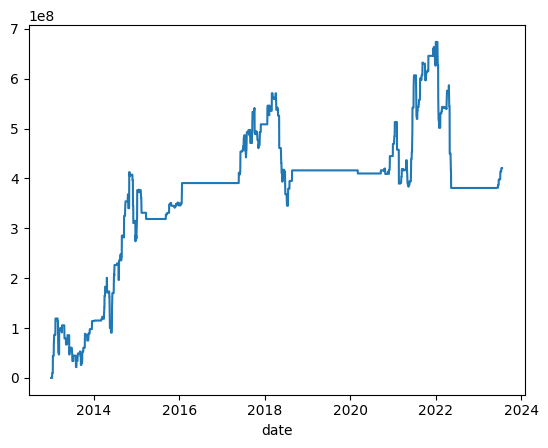

In [127]:
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()

In [128]:
sharpe, max_dd = perf_metrics(universe_pnl)
print(f"Sharpe ratio: {sharpe}")
print(f"Max drawdown: {max_dd}")

Sharpe ratio: 0.35870621418792015
Max drawdown: 43.46746546571513


In [131]:
import optuna

def objective(trial):
    # Suggest parameters
    industry = trial.suggest_categorical('industry', valid_industries)
    # delta_window = trial.suggest_int('delta_window', 2,  10)
    window = trial.suggest_int('window', 100,  252)
    # rolling_window = trial.suggest_int('rolling_window', 4, 100)
    trading_days = trial.suggest_categorical('trading_days', [252, 504])
    condition = trial.suggest_float('condition', 0.01, 0.1)
    top_ticker = trial.suggest_categorical('top_ticker', [3,5])

    # Filter data based on industry
    ticker_list = industries[industries['en_icb_name3'] == industry]['symbol'].tolist()
    available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_price.columns]
    stock_universe = stock_universe_price[available_tickers]
    stock_universe = stock_universe.ffill().fillna(0)
    stock_universe.index = pd.to_datetime(stock_universe.index)
    stock_universe.index = stock_universe.index.date
    stock_universe.index.name = 'date'

    ticker_list = industries[industries['en_icb_name3'] == industry]['symbol'].tolist()
    available_tickers = [ticker for ticker in ticker_list if ticker in stock_universe_vol.columns]
    vol = stock_universe_vol[available_tickers]
    vol = vol.fillna(0)
    vol.index = pd.to_datetime(vol.index)
    vol.index = vol.index.date
    vol.index.name = 'date'

    average_volume = vol.mean()
    sorted_tickers = average_volume.sort_values(ascending=False)
    top_3_tickers = sorted_tickers.head(top_ticker).index.tolist()
    stock_universe = stock_universe[top_3_tickers]

    stock_universe_train = stock_universe.iloc[:-trading_days]
    stock_universe_test = stock_universe.iloc[-trading_days:]

    # Generate orders
    order_matrix = orders(stock_universe_train, window=window, condition=condition)

    # Calculate PnL
    pnl_matrix = calculate_pnl(order_matrix, stock_universe_train)
    daily_pnl = pnl_matrix.sum(axis=1)

    # Compute performance metrics
    sharpe, max_dd = perf_metrics(daily_pnl)

    # Optuna will maximize this
    return sharpe

# Create and run the Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

# Filter trials with Sharpe ratio > 1
successful_trials = [trial for trial in study.trials if trial.value is not None and trial.value > 1]

# Print best parameters and best score
print(f"Best parameters: {study.best_params}")
print(f"Best score (Sharpe ratio): {study.best_value}")

# Print parameters of all successful trials
for trial in successful_trials:
    print(f"Trial {trial.number}:")
    print(f"  Value (Sharpe ratio): {trial.value}")
    print(f"  Parameters: {trial.params}")

[I 2024-08-08 15:48:35,316] A new study created in memory with name: no-name-3232fc07-ede3-44e8-93af-643eb08b8f55
[I 2024-08-08 15:48:36,244] Trial 0 finished with value: 0.4942146213923964 and parameters: {'industry': 'Pharmaceuticals & Biotechnology', 'window': 107, 'trading_days': 504, 'condition': 0.01758589651717117, 'top_ticker': 3}. Best is trial 0 with value: 0.4942146213923964.
[I 2024-08-08 15:48:38,224] Trial 1 finished with value: 0.4951562968617757 and parameters: {'industry': 'Automobiles & Parts', 'window': 220, 'trading_days': 252, 'condition': 0.05524501318203419, 'top_ticker': 5}. Best is trial 1 with value: 0.4951562968617757.
[I 2024-08-08 15:48:40,146] Trial 2 finished with value: -0.10262407490146738 and parameters: {'industry': 'Construction & Materials', 'window': 182, 'trading_days': 252, 'condition': 0.014206913387219185, 'top_ticker': 5}. Best is trial 1 with value: 0.4951562968617757.
[I 2024-08-08 15:48:41,511] Trial 3 finished with value: -0.21643385801558

Best parameters: {'industry': 'Industrial Metals & Mining', 'window': 105, 'trading_days': 504, 'condition': 0.09555112629169991, 'top_ticker': 5}
Best score (Sharpe ratio): 1.4123097266431501
Trial 19:
  Value (Sharpe ratio): 1.0134040527187145
  Parameters: {'industry': 'Industrial Transportation', 'window': 170, 'trading_days': 252, 'condition': 0.047098614732497365, 'top_ticker': 5}
Trial 20:
  Value (Sharpe ratio): 1.0613908299543693
  Parameters: {'industry': 'Industrial Transportation', 'window': 135, 'trading_days': 252, 'condition': 0.045293343769131536, 'top_ticker': 5}
Trial 21:
  Value (Sharpe ratio): 1.1134975645102323
  Parameters: {'industry': 'Industrial Transportation', 'window': 131, 'trading_days': 252, 'condition': 0.04679741410283555, 'top_ticker': 5}
Trial 22:
  Value (Sharpe ratio): 1.0933874543529167
  Parameters: {'industry': 'Industrial Metals & Mining', 'window': 131, 'trading_days': 252, 'condition': 0.04594576519262986, 'top_ticker': 5}
Trial 23:
  Value (S

Sharpe ratio: 1.36
Max drawdown: 10.85%


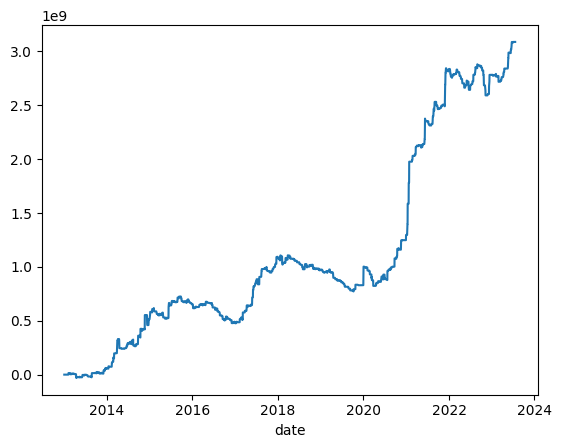

In [103]:
order_matrix = orders(stock_universe_train, study.best_params['delta_window'])
pnl_matrix = calculate_pnl(order_matrix, stock_universe_train)
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()
sharpe, max_dd = perf_metrics(universe_pnl) 
print(f"Sharpe ratio: {sharpe:.2f}")
print(f"Max drawdown: {max_dd:.2f}%")

### OOS

Sharpe ratio: 0.65
Max drawdown: 69.90%


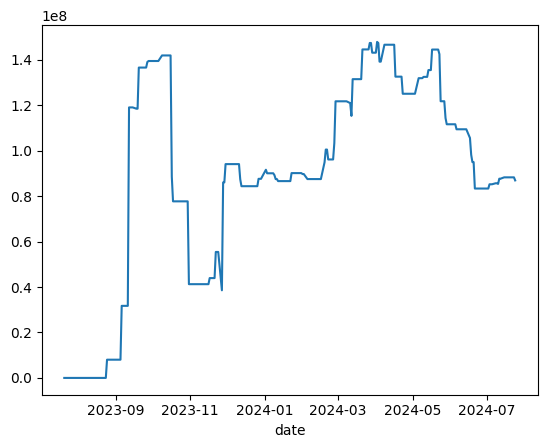

In [104]:
order_matrix = orders(stock_universe_test, study.best_params['delta_window'])
pnl_matrix = calculate_pnl(order_matrix, stock_universe_test)
universe_pnl = pnl_matrix.sum(axis=1)
universe_pnl.cumsum().plot()
sharpe, max_dd = perf_metrics(universe_pnl) 
print(f"Sharpe ratio: {sharpe:.2f}") 
print(f"Max drawdown: {max_dd:.2f}%")